
# Integration Python and R for survival Analysis.

# Research about mantel-hanzelt test
# score log rank test

In [41]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython
# %R -i sdf ; str(sdf)

# Kaplan Meier and long rank test


In [57]:
%%R
# install.packages("survivalROC")
# install.packages("survival")
# install.packages("ggplot")
library(survival)
library(ggplot2)
data = read.csv(file='data.csv')
gender = as.factor(data[,"gender"])
fu_time = data[,"fu_time"] # continuous variable (numeric) 
death = data[,"death"] # binary variable (numeri
cox =coxph(Surv(fu_time, death) ~ age + gender + copd + prior_dnas + ethnicgroup, data=data)
kpm =  survfit(Surv(fu_time, death)~1)
kpm
# print(summary(kpm, times = c(1:7,30,60,90*(1:10))) )

Call: survfit(formula = Surv(fu_time, death) ~ 1)

      n  events  median 0.95LCL 0.95UCL 
   1000     492     749     687     793 


Call:
survdiff(formula = Surv(fu_time, death) ~ gender, rho = 0)

           N Observed Expected (O-E)^2/E (O-E)^2/V
gender=1 548      268      271    0.0365     0.082
gender=2 452      224      221    0.0448     0.082

 Chisq= 0.1  on 1 degrees of freedom, p= 0.8 


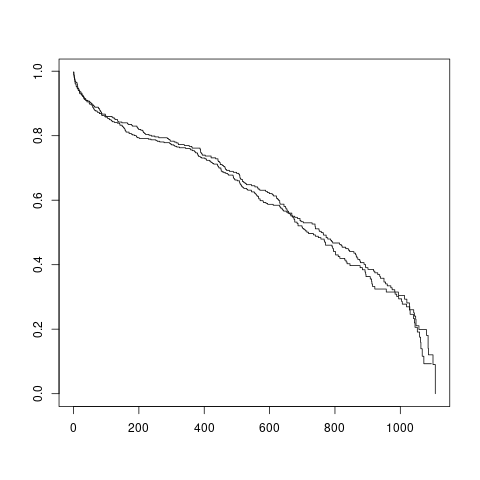

In [3]:
%%R
kpmg = survfit(Surv(fu_time, death) ~ gender) 
plot(kpmg)
# long rank test
survdiff(Surv(fu_time, death) ~ gender, rho=0) 

In [4]:
# age_65plus <- ifelse(g[,"age"]>=65,1,0)

In [5]:
%%R
# install.packages("survminer")  # package to plot in survival

NULL


https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html here we can make the exploration to see in python.
https://stats.stackexchange.com/questions/288393/calculating-survival-probability-per-person-at-time-t-from-cox-ph


# Interpret the results:
Rember that you interpret $e^{\beta}$ for contionous variables  as:
if $\lambda$ >1 then a greater risk, for instance 1.5, this means in all points that a increase of one unity of the variable in all points increase the risk in 50% percent.
if $\lambda<1$ then  you can say that $1-\lambda$ is the risk.

Remember that we assumme a linear relation among predictors and hazard

In [6]:
%%R
head(data)

  id death los age gender cancer cabg crt defib dementia diabetes hypertension
1  1     0   2  90      2      0    0   0     0        0        0            0
2  2     0  10  74      1      0    0   0     0        0        0            1
3  3     0   3  83      2      0    0   0     0        0        0            1
4  4     0   1  79      1      0    0   0     0        0        1            1
5  5     0  17  94      2      0    0   0     0        0        1            1
6  6     0  47  89      1      0    0   0     0        0        0            0
  ihd mental_health arrhythmias copd obesity pvd renal_disease valvular_disease
1   0             0           1    0       0   0             0                1
2   1             0           0    0       0   0             1                1
3   0             0           1    0       0   0             0                0
4   1             0           0    1       0   0             0                0
5   0             0           0    0       0   

In [7]:
%%R
# Missing data
summary(data)

       id             death            los             age        
 Min.   :   1.0   Min.   :0.000   Min.   : 0.00   Min.   : 29.00  
 1st Qu.: 250.8   1st Qu.:0.000   1st Qu.: 3.00   1st Qu.: 73.00  
 Median : 500.5   Median :0.000   Median : 7.00   Median : 80.00  
 Mean   : 500.5   Mean   :0.492   Mean   :10.77   Mean   : 78.73  
 3rd Qu.: 750.2   3rd Qu.:1.000   3rd Qu.:13.00   3rd Qu.: 87.00  
 Max.   :1000.0   Max.   :1.000   Max.   :89.00   Max.   :102.00  
                                                                  
     gender          cancer           cabg            crt       
 Min.   :1.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :1.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :1.452   Mean   :0.051   Mean   :0.014   Mean   :0.003  
 3rd Qu.:2.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :2.000   Max.   :1.000   Max.   :1.000   Max.   :1.000  
         

In [8]:
%%R
# Multiple model
gender = as.factor(data[,"gender"])
cox <- coxph(Surv(fu_time, death) ~ age + gender + copd + prior_dnas, data=data)
summary(cox)

Call:
coxph(formula = Surv(fu_time, death) ~ age + gender + copd + 
    prior_dnas, data = data)

  n= 1000, number of events= 492 

                coef exp(coef)  se(coef)      z Pr(>|z|)    
age         0.063406  1.065459  0.005521 11.484  < 2e-16 ***
gender     -0.274285  0.760115  0.093788 -2.925  0.00345 ** 
copd        0.128151  1.136725  0.103391  1.239  0.21517    
prior_dnas  0.147603  1.159053  0.035616  4.144 3.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           exp(coef) exp(-coef) lower .95 upper .95
age           1.0655     0.9386    1.0540    1.0771
gender        0.7601     1.3156    0.6325    0.9135
copd          1.1367     0.8797    0.9282    1.3921
prior_dnas    1.1591     0.8628    1.0809    1.2429

Concordance= 0.665  (se = 0.013 )
Likelihood ratio test= 161.2  on 4 df,   p=<2e-16
Wald test            = 136.1  on 4 df,   p=<2e-16
Score (logrank) test = 133.6  on 4 df,   p=<2e-16



# Not convergence
take in mind zeros, or categories without one or both events.

# Cox model fit


## Residuals

### schoenfeld residuals
This test allow us know if the hazards are proportional.

### Martingale residual
This allow us if continuous predictors are linearly related the event of interest.

### Deviance residual
To see influential points.
# check that apply for all variables.

       chisq df    p
copd    1.24  1 0.27
GLOBAL  1.24  1 0.27


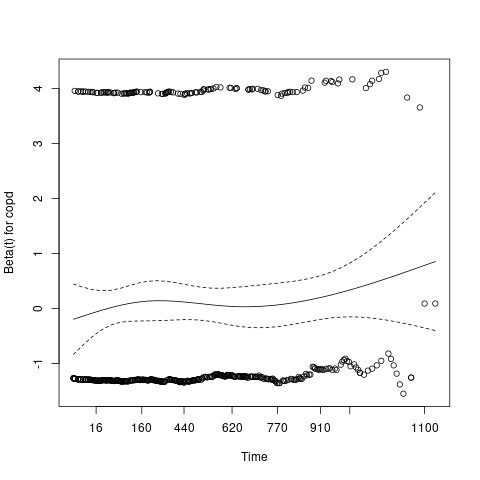

In [9]:
%%R
fit <- coxph(Surv(fu_time, death) ~ copd, data=data) # fit the desired model
temp <- cox.zph(fit)# apply the cox.zph function to the desired model
print(temp) # display the results
plot(temp) # plot the curve
#The relatively high p value from the test confirms what our eyes suggest from looking at the plot. The line is pretty flat, meaning that the effect of gender changes little during the follow-up period. That’s good news. (take from coursera)


In [10]:
import pandas as pd 
df = pd.read_csv('data.csv')

# Survival in python
df


# Cox regression in python

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod = smf.phreg("fu_time ~ age + C(gender) + C(copd) + C(prior_dnas)",  status='death', data=df)
rslt = mod.fit()
print(rslt.summary())

                               Results: PHReg
Model:                          PH Reg            Sample size:           1000
Dependent variable:             fu_time           Num. events:           492 
Ties:                           Breslow                                      
-----------------------------------------------------------------------------
                     log HR   log HR SE    HR      t    P>|t|  [0.025  0.975]
-----------------------------------------------------------------------------
C(gender)[T.2]       -0.2792      0.0945 0.7564 -2.9543 0.0031 0.6285  0.9103
C(copd)[T.1]          0.1227      0.1042 1.1305  1.1779 0.2389 0.9218  1.3866
C(prior_dnas)[T.1]    0.0394      0.1270 1.0402  0.3104 0.7562 0.8110  1.3341
C(prior_dnas)[T.2]    0.3410      0.1978 1.4063  1.7236 0.0848 0.9543  2.0724
C(prior_dnas)[T.3]    0.5659      0.2576 1.7610  2.1971 0.0280 1.0630  2.9175
C(prior_dnas)[T.4]    0.9018      0.3615 2.4641  2.4946 0.0126 1.2132  5.0046
C(prior_dnas)[T.5]

/usr/lib64/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/usr/local/lib64/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Simulate data


\section{Exponential distribution}

\begin{equation}

\end{equation}

In [12]:
def dexp(x, parameter, mode='pdf'):
    if mode=='pdf':
        pdf = parameter * np.exp(-parameter*x)
        return pdf
    if mode=='cdf':
        cdf = 1 - np.exp(np.exp(-parameter*x))
        return cdf
        

In [13]:
x = np.linspace(1,10,100)
lmbd = 0.3
plt.plot(x, dexp(x,lmbd))

NameError: name 'plt' is not defined

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.duration.hazard_regression import PHReg

In [15]:
exog = np.zeros(1000)  # Create a array of zeros.
exog[500:] = 1
endog = -np.exp(np.log(2)*exog) * np.log(np.random.uniform(size=1000))

(array([601., 225.,  94.,  44.,  13.,  14.,   5.,   1.,   1.,   2.]),
 array([4.42352946e-04, 1.27591734e+00, 2.55139233e+00, 3.82686732e+00,
        5.10234231e+00, 6.37781730e+00, 7.65329228e+00, 8.92876727e+00,
        1.02042423e+01, 1.14797173e+01, 1.27551922e+01]),
 <a list of 10 Patch objects>)

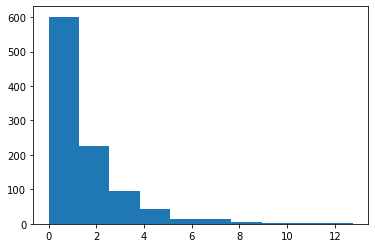

In [16]:
plt.hist(endog)

In [17]:
-np.exp(np.log(2)*1)

-2.0

In [ ]:
mod = PHReg(endog, exog)
rslt = mod.fit()
print (rslt.summary())

In [13]:
from sksurv.datasets import load_whas500
from sksurv.linear_model import CoxPHSurvivalAnalysis
X, y = load_whas500()
estimator = CoxPHSurvivalAnalysis().fit(X, y)
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:10])

/usr/local/lib64/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [14]:
X   # x is the covariables and
y # have the event in tuples having the first as event and second as time

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1,83.0,0,25.54051,0,1,78.0,0,89.0,5.0,1,0,0,152.0
1,0,49.0,0,24.02398,0,1,60.0,0,84.0,5.0,0,1,0,120.0
2,0,70.0,0,22.14290,0,0,88.0,1,83.0,5.0,0,1,0,147.0
3,0,70.0,0,26.63187,1,1,76.0,0,65.0,10.0,0,1,0,123.0
4,0,70.0,0,24.41255,0,1,85.0,0,63.0,6.0,0,1,0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,76.0,0,27.96454,0,1,88.0,1,68.0,1.0,0,1,0,112.0
496,0,76.0,0,24.26862,0,1,96.0,1,88.0,3.0,0,0,0,208.0
497,1,57.0,0,42.13576,0,1,74.0,1,123.0,3.0,0,0,0,120.0
498,0,67.0,0,27.40905,0,1,62.0,0,59.0,1.0,0,1,0,112.0


array([(False, 2.178e+03), (False, 2.172e+03), (False, 2.190e+03),
       ( True, 2.970e+02), (False, 2.131e+03), ( True, 1.000e+00),
       (False, 2.122e+03), ( True, 1.496e+03), ( True, 9.200e+02),
       (False, 2.175e+03), (False, 2.173e+03), ( True, 1.671e+03),
       (False, 2.192e+03), ( True, 8.650e+02), (False, 2.166e+03),
       (False, 2.168e+03), ( True, 9.050e+02), ( True, 2.353e+03),
       (False, 2.146e+03), ( True, 6.100e+01), ( True, 2.358e+03),
       (False, 2.114e+03), (False, 2.132e+03), (False, 2.139e+03),
       (False, 2.048e+03), (False, 2.152e+03), ( True, 6.000e+00),
       (False, 2.156e+03), ( True, 1.180e+02), (False, 2.064e+03),
       ( True, 8.490e+02), ( True, 7.140e+02), (False, 2.057e+03),
       ( True, 2.000e+00), ( True, 7.000e+00), (False, 2.151e+03),
       ( True, 6.000e+00), ( True, 4.220e+02), ( True, 3.540e+02),
       (False, 2.065e+03), (False, 2.048e+03), ( True, 1.065e+03),
       ( True, 5.350e+02), (False, 2.118e+03), ( True, 9.700e+

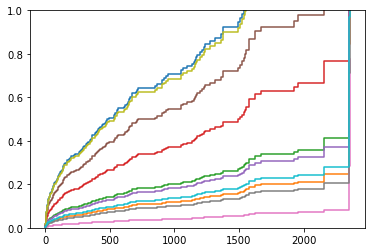

In [33]:
chf_funcs
for fn in chf_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0, 1)
plt.show()

In [34]:
surv_funcs = estimator.predict_survival_function(X.iloc[:10])

/usr/local/lib64/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


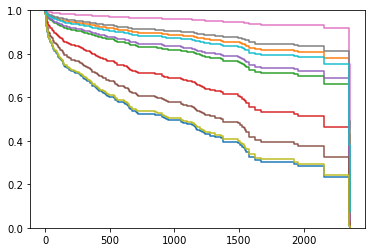

In [36]:
for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0, 1)
plt.show()

In [9]:
data

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2.0,1.0,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,8,73,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,1.0,351
996,997,1,5,84,2,0,0,0,0,0,...,0,0,9,0,0,0,0,3.0,1.0,1030
997,998,0,3,87,1,0,0,0,0,0,...,0,0,3,0,0,0,0,4.0,1.0,15
998,999,1,62,86,2,0,0,0,0,0,...,0,1,1,0,0,0,0,2.0,1.0,339


In [39]:
import pandas as pd 
import numpy as np
base = pd.read_csv('data.csv')
data = base.copy()
binnary= ['gender','ethnicgroup','copd']
for var in binnary:
    data = pd.get_dummies(data,prefix=[var], columns = [var], drop_first=True)
from sksurv.linear_model import CoxPHSurvivalAnalysis
import sksurv
estimator = CoxPHSurvivalAnalysis()
data.dropna(inplace=True)
y= data.iloc[:,[1,-1]]
Xv = ['age','gender_2',  'copd_1','prior_dnas' , 'ethnicgroup_2.0', 'ethnicgroup_3.0',
       'ethnicgroup_9.0']
X = data[Xv]
y =  sksurv.util.Surv.from_dataframe('death', 'fu_time', data=data)
estimator = CoxPHSurvivalAnalysis().fit(X, y)
print(estimator.coef_)  ## This is usedt to show   this correspond to hazard ratio..
np.exp(estimator.coef_) #each time that you have a year additional the hazard increase in 0.57 percent.
## intepreting results..
# for instance the hazard of copd is 15 higher relative those who dont have copd.


[ 0.0618755  -0.24814961  0.14361732  0.16434664 -0.30760246 -0.82161391
  0.40781821]


array([1.06382989, 0.7802432 , 1.15444224, 1.1786228 , 0.73520753,
       0.43972141, 1.50353381])

# Asumptions
\section{schoenfeld residual}
test if two hazard function are parallel or proportional.

the rigth way is that the line be flat, the effect of the variable change little during follow up-




\section{martingale residual}
test if continuous variable has a linear relationship with outcome

\section{Deviance residual}
one point could affect dramatically the estimation.




## choose predictors:




Index(['id', 'death', 'los', 'age', 'cancer', 'cabg', 'crt', 'defib',
       'dementia', 'diabetes', 'hypertension', 'ihd', 'mental_health',
       'arrhythmias', 'obesity', 'pvd', 'renal_disease', 'valvular_disease',
       'metastatic_cancer', 'pacemaker', 'pneumonia', 'prior_appts_attended',
       'prior_dnas', 'pci', 'stroke', 'senile', 'quintile', 'fu_time',
       'gender_2', 'ethnicgroup_2.0', 'ethnicgroup_3.0', 'ethnicgroup_9.0',
       'copd_1'],
      dtype='object')